# Model Training
### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/pwf.csv')

Show Top 5 Records

In [ ]:
df.head()

Drop rows with N2 pumping rate higher than 1000 scf/min or when CTU depth is shallower than 10000 ft.

In [5]:
df.drop(df[df['n2_rate'] > 1000].index, inplace=True)
df.drop(df[df['ct_depth'] < 10000].index, inplace=True)

In [8]:
X = df.drop(columns=['p_gauge'],axis=1)

In [6]:
y = df['p_gauge']

In [9]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
#cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
#oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer([("StandardScaler", numeric_transformer, num_features)])

In [10]:
X = preprocessor.fit_transform(X)

In [11]:
X.shape

(5136, 3)

In [12]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((4108, 3), (1028, 3))

Create an Evaluate Function to give all metrics after model Training

In [13]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [14]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 207.6777
- Mean Absolute Error: 83.4056
- R2 Score: 0.8870
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 215.9258
- Mean Absolute Error: 84.6525
- R2 Score: 0.8712


Lasso
Model performance for Training set
- Root Mean Squared Error: 207.6871
- Mean Absolute Error: 82.8492
- R2 Score: 0.8870
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 215.9362
- Mean Absolute Error: 84.0690
- R2 Score: 0.8712


Ridge
Model performance for Training set
- Root Mean Squared Error: 207.6777
- Mean Absolute Error: 83.4200
- R2 Score: 0.8870
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 215.9170
- Mean Absolute Error: 84.6600
- R2 Score: 0.8712


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 63.8466
- Mean Absolute Error: 12.6246
- R2 Score: 0.9893
---

In [15]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
6,XGBRegressor,0.998953
7,CatBoosting Regressor,0.998798
4,Decision Tree,0.998477
5,Random Forest Regressor,0.997818
3,K-Neighbors Regressor,0.986668
8,AdaBoost Regressor,0.971073
2,Ridge,0.871197
0,Linear Regression,0.871186
1,Lasso,0.871174


#### XGBRegressor

In [16]:
lin_model = XGBRegressor(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

e:\Projects\Pwf from Pumping Pressure\venv\lib\site-packages\xgboost\core.py:160: UserWarning: [15:09:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "fit_intercept" } are not used.

  warnings.warn(smsg, UserWarning)


 Accuracy of the model is 99.90


#### Plot y_pred and y_test

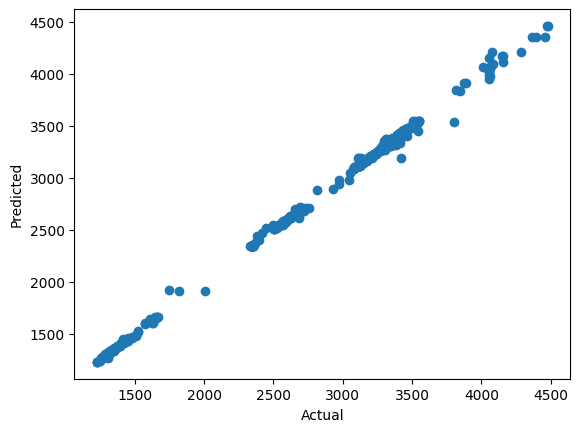

In [17]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

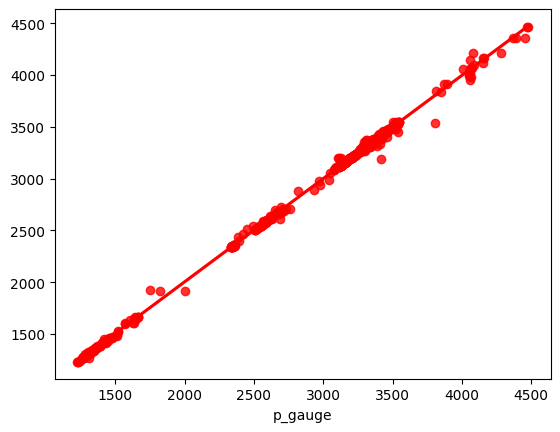

In [18]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [19]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
2907,3320.0610,3320.598145,-0.537145
4441,3215.9060,3215.180176,0.725824
3584,1573.3440,1593.116943,-19.772943
2251,3355.9374,3360.639648,-4.702248
3424,3805.3640,3538.313232,267.050768
...,...,...,...
4993,3314.6370,3372.912842,-58.275842
5376,2596.1324,2597.024170,-0.891770
1813,3377.0426,3375.602295,1.440305
510,3448.1570,3453.306396,-5.149396
